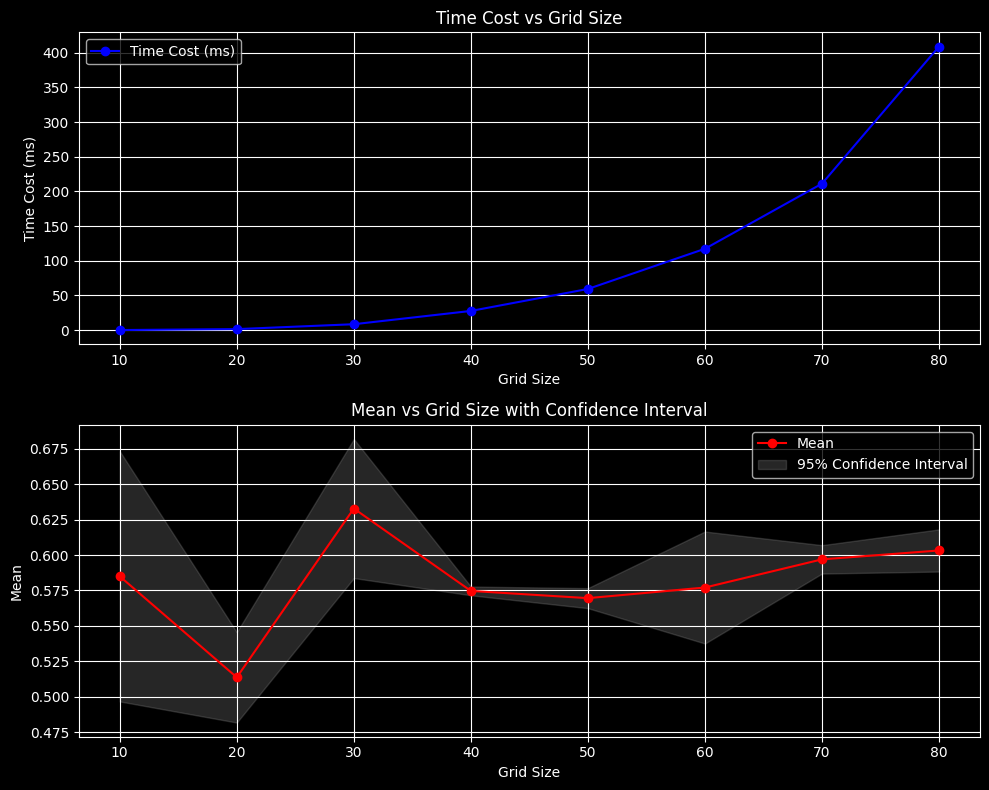

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
grid_sizes = [10, 20, 30, 40, 50, 60, 70, 80]
costs = [0.123, 1.47355, 8.5232, 27.6589, 59.342, 117.297, 211.154, 408.857]
means = [0.585, 0.51375, 0.632778, 0.574687, 0.5696, 0.577083, 0.596939, 0.603203]
stddevs = [0.0636396, 0.0229809, 0.0353553, 0.00220972, 0.00509117, 0.0284807, 0.00721537, 0.0107171]
ci_lower = [0.4968, 0.4819, 0.583778, 0.571625, 0.562544, 0.537611, 0.586939, 0.58835]
ci_upper = [0.6732, 0.5456, 0.681778, 0.57775, 0.576656, 0.616556, 0.606939, 0.618056]

# 创建一个2x1的子图，分别绘制时间开销与均值变化曲线
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 绘制时间开销随grid变化的曲线
axs[0].plot(grid_sizes, costs, marker='o', color='b', label='Time Cost (ms)')
axs[0].set_title('Time Cost vs Grid Size')
axs[0].set_xlabel('Grid Size')
axs[0].set_ylabel('Time Cost (ms)')
axs[0].grid(True)

# 绘制统计均值随grid变化的曲线
axs[1].plot(grid_sizes, means, marker='o', color='r', label='Mean')
axs[1].fill_between(grid_sizes, np.array(ci_lower), np.array(ci_upper), color='gray', alpha=0.3, label='95% Confidence Interval')
axs[1].set_title('Mean vs Grid Size with Confidence Interval')
axs[1].set_xlabel('Grid Size')
axs[1].set_ylabel('Mean')
axs[1].grid(True)

# 显示图例
for ax in axs:
    ax.legend()

plt.tight_layout()
plt.show()


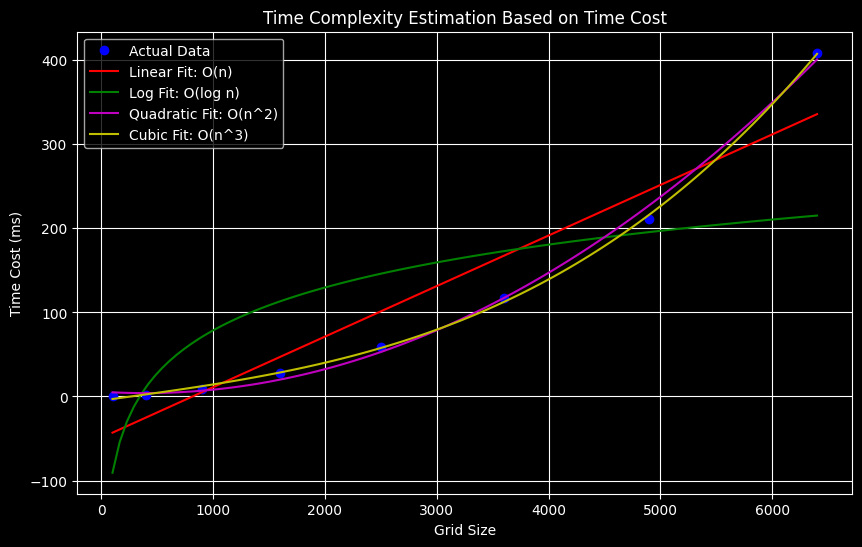

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据
grid_sizes = np.array([10, 20, 30, 40, 50, 60, 70, 80]) ** 2
costs = np.array([0.123, 1.47355, 8.5232, 27.6589, 59.342, 117.297, 211.154, 408.857])

# 定义常见复杂度模型
def linear(x, a, b):
    return a * x + b

def log(x, a, b):
    return a * np.log(x) + b

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# 对数据进行拟合
params_linear, _ = curve_fit(linear, grid_sizes, costs)
params_log, _ = curve_fit(log, grid_sizes, costs)
params_quadratic, _ = curve_fit(quadratic, grid_sizes, costs)
params_cubic, _ = curve_fit(cubic, grid_sizes, costs)

# 绘制原始数据
plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, costs, 'bo', label="Actual Data")

# 绘制拟合曲线
x_vals = np.linspace(10**2, 80**2, 100)

plt.plot(x_vals, linear(x_vals, *params_linear), 'r-', label="Linear Fit: O(n)")
plt.plot(x_vals, log(x_vals, *params_log), 'g-', label="Log Fit: O(log n)")
plt.plot(x_vals, quadratic(x_vals, *params_quadratic), 'm-', label="Quadratic Fit: O(n^2)")
plt.plot(x_vals, cubic(x_vals, *params_cubic), 'y-', label="Cubic Fit: O(n^3)")

# 设置图表标题和标签
plt.title("Time Complexity Estimation Based on Time Cost")
plt.xlabel("Grid Size")
plt.ylabel("Time Cost (ms)")
plt.legend()

# 显示图表
plt.grid(True)
plt.show()
